<a href="https://colab.research.google.com/github/egorssed/Fake_News_Detection/blob/main/Psychology_DataAnalysis_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


# from Egor

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
from os.path import join
import scipy
import statsmodels.regression.linear_model as LM
from matplotlib.ticker import MaxNLocator

plt.rcParams['figure.figsize'] = [7, 5]

In [ ]:
#Folder_path='drive/MyDrive/epfl/Fakenews/StatAnalysis/'
Folder_path='/content/drive/My Drive/Psychology/'

Data_path='Data_Processed.xlsx'
df=pd.read_excel(join(Folder_path,Data_path))
df.head()

,participant,feed_sample_1:1,feed_sample_1:2,age:1,nationality:1,gender:1,gender:other,education:1,feed1_1:1,feed1_1:2,Abortion FN,feed1_3:2,feed1_2:1,feed1_2:2,Climate TN,feed3_3:2,feed3_1:1,feed3_1:2,feed3_2:1,feed3_2:2,feed4_1:1,feed4_1:2,Domestic violence FN,feed4_3:2,feed4_2:1,feed4_2:2,feed6_1:1,feed6_1:2,Homophobia FN,feed6_3:2,feed6_2:1,feed6_2:2,feed7_1:1,feed7_1:2,feed7_2:1,feed7_2:2,Weed TN,feed7_3:2,FN Loss,FN Score,...,A1,A2,A3,A4,A5,Agreeability,C6,C7,C8,C9,C10,Consciousness,E11,E12,E13,E14,E15,Extroversion,H16,H17,H18,H19,H20,Honesty,O21,O22,O23,O24,O25,Originality,R26,R27,R28,R29,R30,Resiliency,email_addr:1,TIME_start,TIME_end,TIME_total
0,s.383a7ac8-51de-4be8-82f9-0a5adfab7f2f.txt,3.0,1.0,20.0,Russian,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-15-15-54,NaN,NaN
1,s.a88c0a70-878f-4148-a335-ef8e351deee1.txt,6.0,4.0,19.0,swedish,2.0,NaN,4.0,2.0,0.0,4.0,6.0,9.0,10.0,3.0,6.0,0.0,1.0,3.0,6.0,2.0,0.0,4.0,7.0,1.0,0.0,9.0,10.0,4.0,1.0,4.0,0.0,6.0,3.0,7.0,0.0,4.0,7.0,25.0,0.6,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,4.0,2.0,1.0,1.8,5.0,5.0,5.0,5.0,5.0,5.0,4.0,2.0,5.0,3.0,3.0,3.4,5.0,5.0,3.0,2.0,5.0,4.0,1.0,3.0,1.0,2.0,1.0,1.6,alienorc01@gmail.com,2021-04-22-16-18,2021-04-22-16-25,7.0
2,s.5eaa59ba-1dde-41c2-a4dd-9f7f8c0bd77a.txt,5.0,3.0,20.0,Portuguese,2.0,NaN,3.0,4.0,0.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,3.0,10.0,4.0,6.0,0.0,7.0,6.0,7.0,3.0,4.0,8.0,2.0,1.0,1.0,0.0,9.0,2.0,6.0,1.0,2.0,6.0,25.0,0.4,...,2.0,2.0,2.0,2.0,1.0,1.8,5.0,4.0,5.0,5.0,2.0,4.2,4.0,4.0,4.0,5.0,4.0,4.2,4.0,2.0,5.0,3.0,4.0,3.6,3.0,4.0,4.0,3.0,4.0,3.6,1.0,2.0,2.0,2.0,1.0,1.6,deboranr53@gmail.com,2021-04-27-13-37,2021-04-27-13-50,13.0
3,s.59f16b8a-4207-4825-9342-43d56a9dc114.txt,5.0,2.0,19.0,Swiss,2.0,NaN,4.0,4.0,0.0,0.0,0.0,7.0,6.0,4.0,2.0,6.0,7.0,7.0,3.0,8.0,2.0,5.0,6.0,5.0,3.0,7.0,6.0,4.0,0.0,0.0,1.0,8.0,5.0,7.0,0.0,7.0,7.0,18.0,0.6,...,3.0,4.0,2.0,2.0,3.0,2.8,2.0,2.0,4.0,2.0,1.0,2.2,4.0,3.0,5.0,5.0,3.0,4.0,2.0,3.0,4.0,2.0,4.0,3.0,4.0,2.0,3.0,3.0,4.0,3.2,2.0,2.0,1.0,3.0,1.0,1.8,gdelidogan@gmail.com,2021-04-27-22-04,2021-04-27-22-19,15.0
4,s.efdf6281-1c94-493f-8e5c-6a2e55dcd6bf.txt,10.0,6.0,20.0,Switzerland,1.0,NaN,3.0,9.0,1.0,0.0,6.0,9.0,1.0,7.0,7.0,9.0,7.0,10.0,1.0,8.0,1.0,9.0,9.0,5.0,5.0,9.0,7.0,1.0,9.0,8.0,1.0,9.0,5.0,5.0,5.0,3.0,7.0,20.0,0.6,...,4.0,5.0,5.0,3.0,4.0,4.2,1.0,1.0,2.0,1.0,1.0,1.2,5.0,3.0,5.0,4.0,2.0,3.8,5.0,3.0,5.0,2.0,3.0,3.6,5.0,4.0,4.0,4.0,4.0,4.2,3.0,5.0,2.0,5.0,3.0,3.6,NaN,2021-04-21-15-54,2021-04-21-16-23,29.0


## Data cleaning

Apparently there are no multi-gender people there, hence this column is completely useless

In [ ]:
print(np.isnan(df['gender:other']).all())
df.drop('gender:other',axis=1,inplace=True)

True


These people didn't manage to reach feeds, so there is no use in them either

In [ ]:
print('people who did not reach feeds',df[np.isnan(df['feed1_1:1'])].index.to_numpy())

people who did not reach feeds [ 0 71]


In [ ]:
df=df[np.logical_not(np.isnan(df['feed1_1:1']))]

Nan emails only. Seems sensible. I guess we can work with this dataset now.

In [ ]:
print('Columns with Nans',df.columns[df.isna().any()].to_numpy())

Columns with Nans ['email_addr:1']


In [ ]:
df.TIME_total.describe()

count      70.000000
mean       93.571429
std       477.143207
min         3.000000
25%        15.000000
50%        19.000000
75%        25.000000
max      3954.000000
Name: TIME_total, dtype: float64

## Data overview

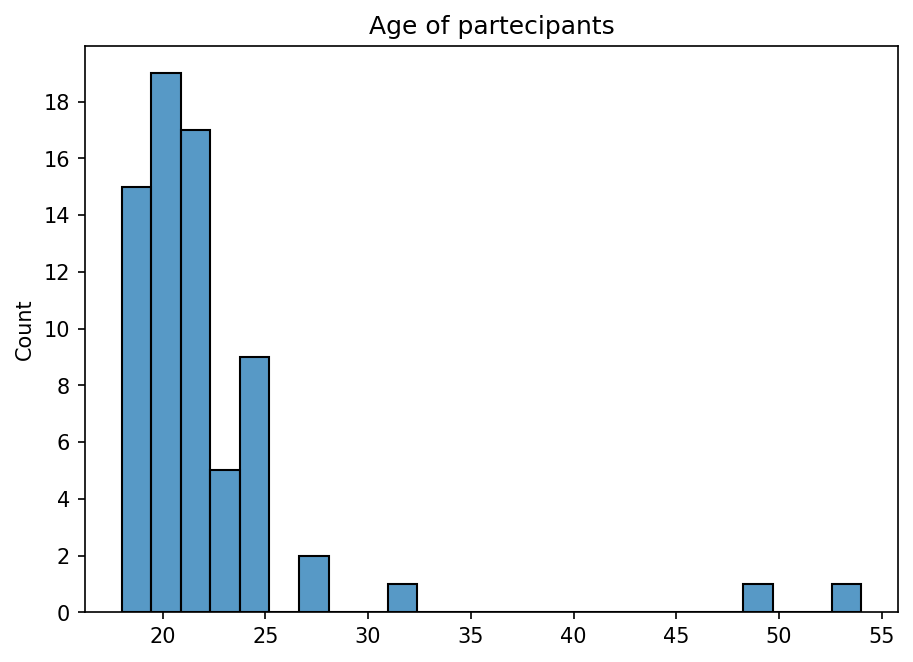

22.228571428571428
5.598906598795947
0.45714285714285713


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


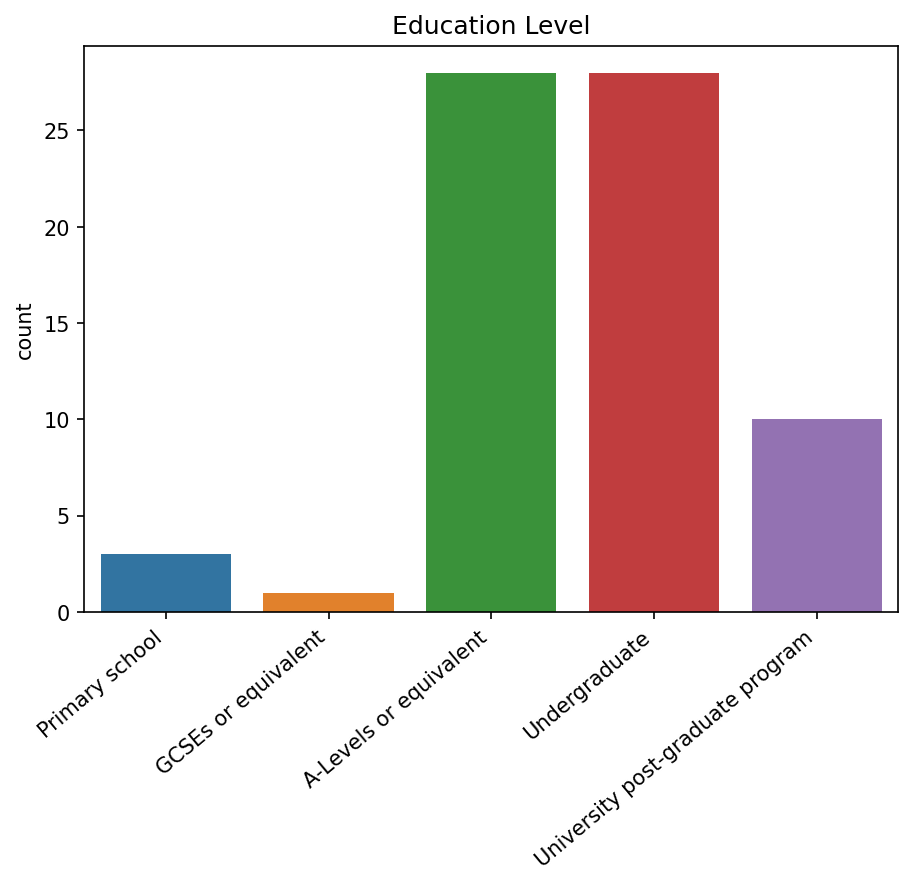

In [ ]:
ax = plt.figure(dpi = 150).gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
sns.histplot(df['age:1'])
plt.title('Age of partecipants')
plt.xlabel('')
plt.show()


age = df['age:1']
print(np.mean(age))
print(np.std(age))

edu = df['education:1']
print(len(edu[edu<4]) / len(edu))

ax = plt.figure(dpi = 150).gca()
sns.countplot(df['education:1'])
plt.title('Education Level')
ax.set_xticklabels(('Primary school','GCSEs or equivalent','A-Levels or equivalent','Undergraduate', 'University post-graduate program'), rotation=40, ha="right")
plt.xlabel('')
plt.show()


In [ ]:
df.columns

Index(['participant', 'feed_sample_1:1', 'feed_sample_1:2', 'age:1',
       'nationality:1', 'gender:1', 'education:1', 'feed1_1:1', 'feed1_1:2',
       'Abortion FN', 'feed1_3:2', 'feed1_2:1', 'feed1_2:2', 'Climate TN',
       'feed3_3:2', 'feed3_1:1', 'feed3_1:2', 'feed3_2:1', 'feed3_2:2',
       'feed4_1:1', 'feed4_1:2', 'Domestic violence FN', 'feed4_3:2',
       'feed4_2:1', 'feed4_2:2', 'feed6_1:1', 'feed6_1:2', 'Homophobia FN',
       'feed6_3:2', 'feed6_2:1', 'feed6_2:2', 'feed7_1:1', 'feed7_1:2',
       'feed7_2:1', 'feed7_2:2', 'Weed TN', 'feed7_3:2', 'FN Loss', 'FN Score',
       'Refugees', 'Healthcare', 'Basic quality of living', 'Same sex couples',
       'Abortion', 'National defense', 'Death penalty', 'Light drugs',
       'Climate change', 'Minorities', 'Self-identify', 'Political Score',
       'Error', 'A1', 'A2', 'A3', 'A4', 'A5', 'Agreeability', 'C6', 'C7', 'C8',
       'C9', 'C10', 'Consciousness', 'E11', 'E12', 'E13', 'E14', 'E15',
       'Extroversion', 'H16', '

In [ ]:
np.array(df['nationality:1'])

array(['swedish', 'Portuguese ', 'Swiss', 'Switzerland', 'Russian',
       'Swiss', 'swiss', 'Swiss', 'Italian', 'Brazilian ', 'Italian',
       'Lithuanian', 'Italian', 'Italian', 'Swiss', 'German ', 'Swiss',
       'swiss', 'French ', 'swiss', 'SWISS', 'Russian', 'Swiss', 'Swiss',
       'Suisse', 'Swiss', 'Switzerland', 'Swiss', 'Italian', 'italy',
       'British', 'Swiss', 'swiss', 'SUISSE', 'Dutch', 'Swiss',
       'Lebanese', 'Swiss', 'Italian', 'Swiss and Italian', 'Swiss',
       'French', 'Swiss', 'Russian', 'Swiss', 'Portuguese ', 'Suisse',
       'Brazilian', 'Italian', 'Italia', 'swiss', 'Switzerland', 'Swiss',
       'USA', 'Swiss', 'romanian', 'Russian', 'French', 'switzerland',
       'Belgian', 'Switzerland', 'Swiss and French', 'Swiss', 'Swiss',
       'swiss', 'Swiss', 'Swiss', 'Argentine', 'Italy', 'Canada'],
      dtype=object)

In [ ]:
np.isin(df['nationality:1'],['Swiss', 'Switzerland','swiss','SWISS','Suisse','SUISSE','Swiss and Italian','switzerland','Swiss and French']).sum()

38

In [ ]:
['Swiss', 'Switzerland','swiss','SWISS','Suisse','SUISSE','switzerland']

['Swiss', 'Switzerland', 'swiss', 'SWISS', 'Suisse', 'SUISSE', 'switzerland']

In [ ]:
(df['nationality:1']==)

SyntaxError: ignored

In [ ]:
df['age:1'].describe()

In [ ]:
(df['gender:1']==2).sum()

47

In [ ]:
((df['gender:1']-1.5)*2).describe()

count    70.000000
mean      0.342857
std       0.946170
min      -1.000000
25%      -1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: gender:1, dtype: float64

In [ ]:
Fake_news_raw=df[['Abortion FN','Climate TN','Domestic violence FN','Homophobia FN','Weed TN']]
Political_leaning=df[['Refugees', 'Healthcare', 'Basic quality of living', 'Same sex couples',
       'Abortion', 'National defense', 'Death penalty', 'Light drugs',
       'Climate change', 'Minorities', 'Self-identify']]

Hexaco=df[['Agreeability','Consciousness','Extroversion','Honesty','Originality','Resiliency']]

In [ ]:
Hexaco.columns=['Agreeableness','Conscientiousness','Extraversion','Honesty','Originality','Resiliency']

In [ ]:
Hexaco_norm=(Hexaco-Hexaco.min(axis=0))
#Hexaco_norm-=Hexaco_norm.max(axis=0)/2
Hexaco_norm/=Hexaco_norm.max(axis=0)

In [ ]:
Hexaco_norm.describe()

,Agreeableness,Conscientiousness,Extraversion,Honesty,Originality,Resiliency
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,0.531746,0.510317,0.601587,0.601020,0.562857,0.447619
std,0.253544,0.213033,0.226602,0.220407,0.192496,0.245169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.333333,0.444444,0.428571,0.466667,0.222222
50%,0.527778,0.500000,0.638889,0.571429,0.566667,0.444444
75%,0.722222,0.666667,0.777778,0.785714,0.666667,0.611111
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Fake news

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

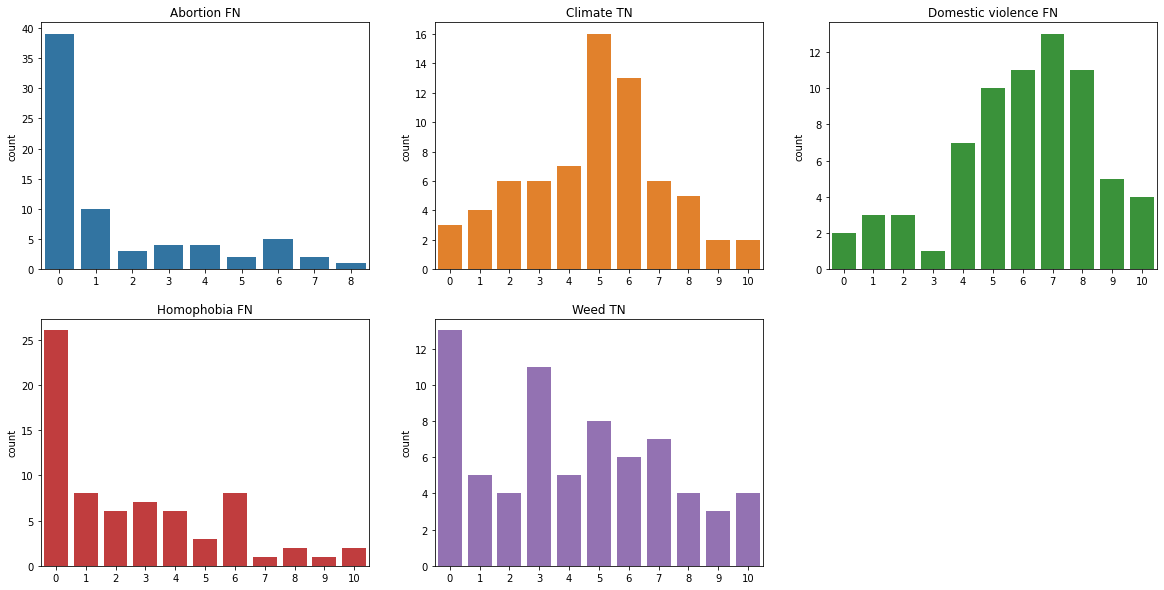

In [ ]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig = plt.figure(figsize= (20,10))
for i,name in enumerate(Fake_news_raw.columns):
  plt.subplot(2,3,i+1)
  
  ax = sns.countplot(Fake_news_raw.iloc[:,i],color = colors[i])
  ax.set_xticklabels( labels = np.arange(0,11))
  plt.title(name)
  plt.xlabel('')

plt.show()

In [ ]:
(Fake_news_raw==0).sum(axis=0)/70

Abortion FN             0.557143
Climate TN              0.042857
Domestic violence FN    0.028571
Homophobia FN           0.371429
Weed TN                 0.185714
dtype: float64

In [ ]:

Fake_news=Fake_news_raw/10


Concerning the score. I would simply choose binary crossentropy. Commonly used for binary classification.

In [ ]:
#0*np.log(0)=0, whereas numpy thinks that it is nan 
def entropy_loss(Answers,Probabilities):
    Loss=np.log(Probabilities)
    Loss[Loss==-np.inf]=0
    return Answers*Probabilities

In [ ]:
def get_BCE(Answers,Dataset):
  #Numpy thinks that nan*0=nan so we turn nan to 0 explicitly
  False_loss=entropy_loss(Answers,Dataset)
  True_loss=entropy_loss(1-Answers,1-Dataset)

  print('Any infs?',np.isinf(False_loss).any().any(),np.isinf(True_loss).any().any())

  # That's negative BCE, so 1-guessed everything, 0-guessed nothing
  BCE=(False_loss+True_loss)/Fake_news.shape[1]
  plt.show()
  return BCE

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Any infs? False False


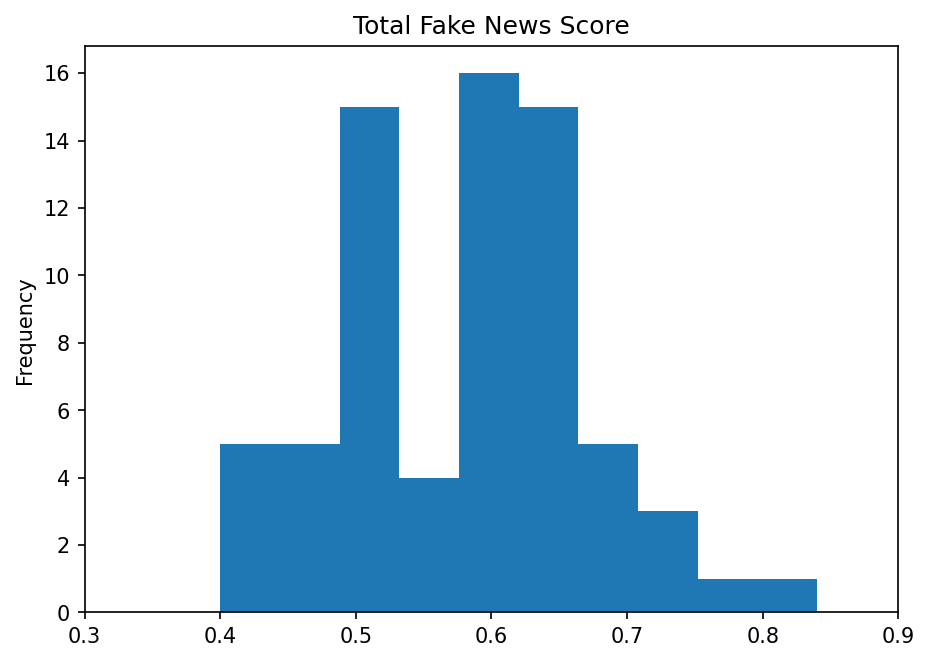

0.09124898252361066


In [ ]:
Fake_news_answers=np.array([False,True,False,False,True])



BCE_original=get_BCE(Fake_news_answers,Fake_news)
plt.figure(dpi = 150)
BCE_original.sum(axis=1).plot.hist(title='Total Fake News Score',xlim=(0.3,0.9))
plt.show()
print(BCE_original.sum(axis=1).std())

In [ ]:
BCE_scores=BCE_original*5
BCE_scores['Total']=BCE_scores.mean(axis=1)

In [ ]:
BCE_scores.describe()

,Abortion FN,Climate TN,Domestic violence FN,Homophobia FN,Weed TN,Total
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,0.847143,0.485714,0.400000,0.742857,0.414286,0.578000
std,0.230765,0.236696,0.243168,0.282110,0.308472,0.091249
min,0.100000,0.000000,0.000000,0.000000,0.000000,0.400000
25%,0.725000,0.300000,0.200000,0.600000,0.125000,0.505000
50%,1.000000,0.500000,0.400000,0.800000,0.400000,0.580000
75%,1.000000,0.600000,0.500000,1.000000,0.675000,0.635000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.840000


use bootstrap here

In [ ]:
def bootstrap_CI_func(data,func, nbr_draws=1000):
    res = np.zeros(nbr_draws)
    data = np.array(data)

    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices] 
        res[n] = func(data_tmp)

    return [np.nanpercentile(res, 2.5),np.nanpercentile(res, 97.5)]

95 % significance

In [ ]:
bootstrap_CI_func(BCE_original.sum(axis=1),np.mean)

[0.558, 0.5974285714285715]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Any infs? False False


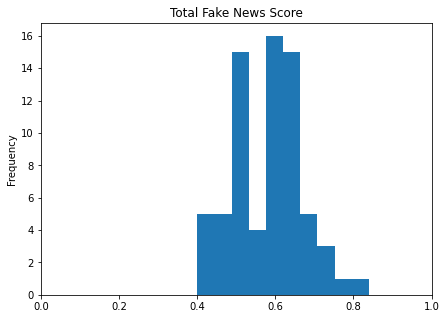

0.09124898252361066


In [ ]:
Fake_news_answers=np.array([False,True,False,False,True])

#Numpy thinks that nan*0=nan so we turn nan to 0 explicitly
False_loss=entropy_loss(Fake_news_answers,Fake_news)
True_loss=entropy_loss(1-Fake_news_answers,1-Fake_news)

print('Any infs?',np.isinf(False_loss).any().any(),np.isinf(True_loss).any().any())

# That's negative BCE, so 1-guessed everything, 0-guessed nothing
BCE=(False_loss+True_loss)/Fake_news.shape[1]
BCE.sum(axis=1).plot.hist(title='Total Fake News Score',xlim=(0,1))
plt.show()
print(BCE.sum(axis=1).std())

Looks like a good gaussian of scores guessing. I'll use these values as Fake News detection scores.

### Political Leaning

Normalise it in the first place. And make it zero-centered

In [ ]:
Political_leaning=(Political_leaning-5.5)/4.5
Political_leaning.head()

,Refugees,Healthcare,Basic quality of living,Same sex couples,Abortion,National defense,Death penalty,Light drugs,Climate change,Minorities,Self-identify
1,-0.777778,-1.0,-0.555556,-1.000000,1.000000,-0.111111,0.111111,1.000000,-1.000000,-0.555556,-1.000000
2,-0.555556,-1.0,-0.111111,-1.000000,1.000000,-0.777778,-1.000000,-0.555556,-0.555556,0.111111,-0.777778
3,-0.777778,-1.0,-0.111111,-0.777778,0.555556,-0.333333,-0.777778,0.111111,0.777778,0.333333,-0.555556
4,-1.000000,-1.0,-0.555556,-1.000000,1.000000,-1.000000,-0.555556,1.000000,-0.777778,-1.000000,-0.777778
5,-1.000000,-1.0,-1.000000,-1.000000,1.000000,-0.777778,0.777778,1.000000,-1.000000,-1.000000,-1.000000


In [ ]:
ProAuthoritarian_columns=['Refugees', 'Healthcare', 'Basic quality of living', 'Same sex couples','National defense','Climate change', 'Minorities']
ProLibertarian_columns=['Abortion','Death penalty', 'Light drugs']
Political_leaning['Political_score']=(Political_leaning[ProAuthoritarian_columns].sum(axis=1)
                                      -Political_leaning[ProLibertarian_columns].sum(axis=1))/(Political_leaning.shape[1]-1)

<Figure size 1050x750 with 0 Axes>

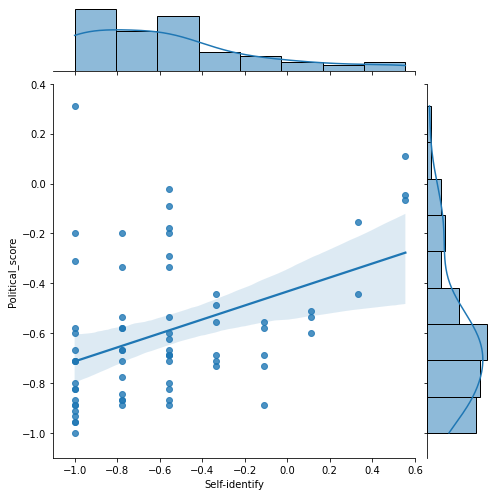

SpearmanrResult(correlation=0.4314237311600313, pvalue=0.0001924101387843294)

In [ ]:
plt.figure(dpi = 150)
g=sns.jointplot(x='Self-identify', y='Political_score', data=Political_leaning,
                  kind="reg",height=7,xlim=(-1.1,0.6),ylim=(-1.1,0.4))
plt.show()
scipy.stats.spearmanr(Political_leaning[['Political_score','Self-identify']])

In [ ]:
PL_norm=(Political_leaning+1)
PL_norm/=2

In [ ]:
PL_norm.iloc[:,-2:].describe()

,Self-identify,Political_score
count,70.000000,70.000000
mean,0.214286,0.203333
std,0.212611,0.142397
min,0.000000,0.000000
25%,0.000000,0.091667
50%,0.222222,0.166667
75%,0.333333,0.252778
max,0.777778,0.655556


<Figure size 1050x750 with 0 Axes>

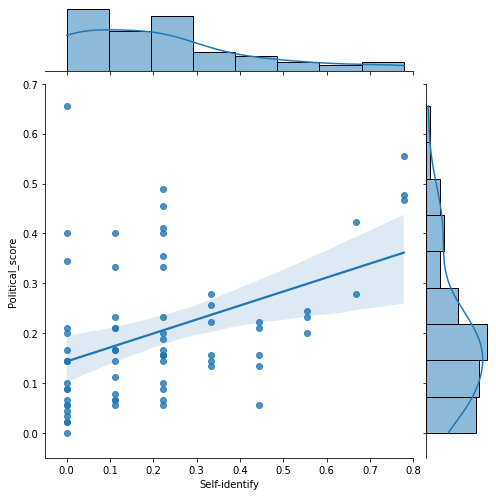

In [ ]:
plt.figure(dpi = 150)
g=sns.jointplot(x='Self-identify', y='Political_score', data=PL_norm,
                  kind="reg",height=7,xlim=(-0.05,0.8),ylim=(-0.05,0.7))
plt.show()

In [ ]:
PL_norm.iloc[:,-2:].describe()

,Self-identify,Political_score
count,70.000000,70.000000
mean,0.214286,0.203333
std,0.212611,0.142397
min,0.000000,0.000000
25%,0.000000,0.091667
50%,0.222222,0.166667
75%,0.333333,0.252778
max,0.777778,0.655556


Correlation seems to be significant (pvalue<0.05), yet function description reads "The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so." Therefore we can not really state anything for 70 instances dataset. I pearsonally see that we have some correlation only starting from -0.25 Self-identify. These are centrist or authoritarian people 

In [ ]:
Political_leaning.head()

,Refugees,Healthcare,Basic quality of living,Same sex couples,Abortion,National defense,Death penalty,Light drugs,Climate change,Minorities,Self-identify,Political_score
1,-0.777778,-1.0,-0.555556,-1.000000,1.000000,-0.111111,0.111111,1.000000,-1.000000,-0.555556,-1.000000,-0.711111
2,-0.555556,-1.0,-0.111111,-1.000000,1.000000,-0.777778,-1.000000,-0.555556,-0.555556,0.111111,-0.777778,-0.333333
3,-0.777778,-1.0,-0.111111,-0.777778,0.555556,-0.333333,-0.777778,0.111111,0.777778,0.333333,-0.555556,-0.177778
4,-1.000000,-1.0,-0.555556,-1.000000,1.000000,-1.000000,-0.555556,1.000000,-0.777778,-1.000000,-0.777778,-0.777778
5,-1.000000,-1.0,-1.000000,-1.000000,1.000000,-0.777778,0.777778,1.000000,-1.000000,-1.000000,-1.000000,-0.955556


## Correlations

Comparing directly all scores with all political leaning elements of the questionnaire

In [ ]:
df_all=BCE.copy()
df_all['Fake_news_score']=df_all.sum(axis=1)
df_all=df_all.merge(Political_leaning,left_index=True,right_index=True)
df_all=df_all.merge(Hexaco,left_index=True,right_index=True)
df_all.head()

,Abortion FN,Climate TN,Domestic violence FN,Homophobia FN,Weed TN,Fake_news_score,Refugees,Healthcare,Basic quality of living,Same sex couples,Abortion,National defense,Death penalty,Light drugs,Climate change,Minorities,Self-identify,Political_score,Agreeableness,Conscientiousness,Extraversion,Honesty,Originality,Resiliency
1,0.12,0.06,0.12,0.12,0.08,0.50,-0.777778,-1.0,-0.555556,-1.000000,1.000000,-0.111111,0.111111,1.000000,-1.000000,-0.555556,-1.000000,-0.711111,2.0,1.8,5.0,3.4,4.0,1.6
2,0.20,0.04,0.06,0.16,0.04,0.50,-0.555556,-1.0,-0.111111,-1.000000,1.000000,-0.777778,-1.000000,-0.555556,-0.555556,0.111111,-0.777778,-0.333333,1.8,4.2,4.2,3.6,3.6,1.6
3,0.20,0.08,0.10,0.12,0.14,0.64,-0.777778,-1.0,-0.111111,-0.777778,0.555556,-0.333333,-0.777778,0.111111,0.777778,0.333333,-0.555556,-0.177778,2.8,2.2,4.0,3.0,3.2,1.8
4,0.20,0.14,0.02,0.18,0.06,0.60,-1.000000,-1.0,-0.555556,-1.000000,1.000000,-1.000000,-0.555556,1.000000,-0.777778,-1.000000,-0.777778,-0.777778,4.2,1.2,3.8,3.6,4.2,3.6
5,0.14,0.16,0.04,0.10,0.10,0.54,-1.000000,-1.0,-1.000000,-1.000000,1.000000,-0.777778,0.777778,1.000000,-1.000000,-1.000000,-1.000000,-0.955556,4.2,4.2,3.6,4.2,5.0,2.6


In [ ]:
def spearmanr_pval(x,y):
    return scipy.stats.spearmanr(x,y)[1]

# calculate the correlations
corr = df_all.corr(method='spearman')
# calculate p-values
corr_p = df_all.corr(method=spearmanr_pval)

In [ ]:
# select correlations and p-values of interest, namely Fake News columns
# Also get rid of Fake News indices (iloc[6:]), since they obviously have corr=1
corr_selected = corr[df_all.columns[:6]].loc[df_all.columns.values].iloc[6:]
corr_p_selected = corr_p[df_all.columns[:6]].loc[df_all.columns.values].iloc[6:]
print(corr[corr_p < 0.051]['Resiliency'])
print(corr_p['Resiliency'])

Abortion FN                     NaN
Climate TN                      NaN
Domestic violence FN            NaN
Homophobia FN                   NaN
Weed TN                         NaN
Fake_news_score                 NaN
Refugees                        NaN
Healthcare                      NaN
Basic quality of living         NaN
Same sex couples                NaN
Abortion                        NaN
National defense                NaN
Death penalty              0.257917
Light drugs                     NaN
Climate change                  NaN
Minorities                      NaN
Self-identify                   NaN
Political_score                 NaN
Agreeableness              0.501338
Conscientiousness          0.322286
Extraversion                    NaN
Honesty                         NaN
Originality                     NaN
Resiliency                      NaN
Name: Resiliency, dtype: float64
Abortion FN                0.520541
Climate TN                 0.247732
Domestic violence FN       0.91

In [ ]:
# select correlations and p-values of interest, namely Fake News columns
# Also get rid of Fake News indices (iloc[6:]), since they obviously have corr=1
corr_selected1 = corr[df_all.columns[:6]].loc[df_all.columns.values].iloc[6:-6]
corr_p_selected1 = corr_p[df_all.columns[:6]].loc[df_all.columns.values].iloc[6:-6]


In [ ]:
# select correlations and p-values of interest, namely Fake News columns
# Also get rid of Fake News indices (iloc[6:]), since they obviously have corr=1
corr_selected2 = corr[df_all.columns[:6]].loc[df_all.columns.values].iloc[-6:]
corr_p_selected2 = corr_p[df_all.columns[:6]].loc[df_all.columns.values].iloc[-6:]


In [ ]:
corr_p_selected1

,Abortion FN,Climate TN,Domestic violence FN,Homophobia FN,Weed TN,Fake_news_score
Refugees,0.094103,0.003601,0.692620,0.000010,0.125850,0.160396
Healthcare,0.000668,0.187494,0.331113,0.022852,0.668785,0.047512
Basic quality of living,0.947302,0.792699,0.921140,0.119836,0.184092,0.957511
Same sex couples,0.144178,0.836568,0.779791,0.229093,0.812462,0.041679
Abortion,0.050009,0.816858,0.347024,0.153116,0.405290,0.056588
National defense,0.000230,0.289909,0.134473,0.045660,0.652007,0.424689
Death penalty,0.291163,0.680686,0.050699,0.269757,0.015952,0.273391
Light drugs,0.241478,0.389625,0.329095,0.561838,0.068984,0.596401
Climate change,0.269382,0.599400,0.328189,0.020378,0.226281,0.070236
Minorities,0.183374,0.004539,0.822927,0.003935,0.068000,0.965945


In [ ]:
corr_p_selected1_filt=corr_p_selected1.iloc[np.where((corr_p_selected1<0.05).any(axis=1))[0],np.where((corr_p_selected1<0.05).any(axis=0))[0]]
corr_selected1_filt=corr_selected1.iloc[np.where((corr_p_selected1<0.05).any(axis=1))[0],np.where((corr_p_selected1<0.05).any(axis=0))[0]]
corr_selected1_filt[corr_p_selected1_filt>0.05]=np.nan

In [ ]:

corr_selected1_filt

,Abortion FN,Climate TN,Homophobia FN,Weed TN,Fake_news_score
Refugees,NaN,0.343482,-0.500194,NaN,NaN
Healthcare,-0.396952,NaN,-0.271774,NaN,-0.237732
Same sex couples,NaN,NaN,NaN,NaN,-0.244132
National defense,-0.426749,NaN,-0.239691,NaN,NaN
Death penalty,NaN,NaN,NaN,-0.287128,NaN
Climate change,NaN,NaN,-0.276756,NaN,NaN
Minorities,NaN,0.335370,-0.340400,NaN,NaN
Political_score,-0.262353,NaN,-0.318789,NaN,NaN


In [ ]:
corr_p_selected1_filt

,Abortion FN,Climate TN,Homophobia FN,Weed TN,Fake_news_score
Refugees,0.094103,0.003601,0.000010,0.125850,0.160396
Healthcare,0.000668,0.187494,0.022852,0.668785,0.047512
Same sex couples,0.144178,0.836568,0.229093,0.812462,0.041679
National defense,0.000230,0.289909,0.045660,0.652007,0.424689
Death penalty,0.291163,0.680686,0.269757,0.015952,0.273391
Climate change,0.269382,0.599400,0.020378,0.226281,0.070236
Minorities,0.183374,0.004539,0.003935,0.068000,0.965945
Political_score,0.028231,0.120331,0.007151,0.232506,0.101717


In [ ]:
df_all.columns

Index(['Abortion FN', 'Climate TN', 'Domestic violence FN', 'Homophobia FN',
       'Weed TN', 'Fake_news_score', 'Refugees', 'Healthcare',
       'Basic quality of living', 'Same sex couples', 'Abortion',
       'National defense', 'Death penalty', 'Light drugs', 'Climate change',
       'Minorities', 'Self-identify', 'Political_score', 'Agreeableness',
       'Conscientiousness', 'Extraversion', 'Honesty', 'Originality',
       'Resiliency'],
      dtype='object')

In [ ]:
df_unbiased=df_all[df_all['Abortion FN']!=df_all['Abortion FN'].min()]
scipy.stats.spearmanr(df_unbiased['Abortion FN'],df_unbiased['Political_score'])

SpearmanrResult(correlation=-0.29791375138891946, pvalue=0.012912189262002645)

In [ ]:
df_unbiased=df_all[df_all['Homophobia FN']!=df_all['Homophobia FN'].min()]
scipy.stats.spearmanr(df_unbiased['Homophobia FN'],df_unbiased['Political_score'])

SpearmanrResult(correlation=-0.35063221325405525, pvalue=0.0033737070877100117)

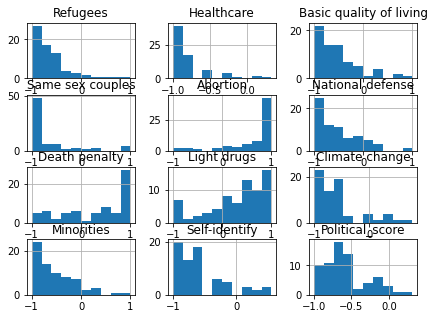

In [ ]:
Political_leaning.hist()
plt.show()

In [ ]:
df_all.columns

Index(['Abortion FN', 'Climate TN', 'Domestic violence FN', 'Homophobia FN',
       'Weed TN', 'Fake_news_score', 'Refugees', 'Healthcare',
       'Basic quality of living', 'Same sex couples', 'Abortion',
       'National defense', 'Death penalty', 'Light drugs', 'Climate change',
       'Minorities', 'Self-identify', 'Political_score', 'Agreeableness',
       'Conscientiousness', 'Extraversion', 'Honesty', 'Originality',
       'Resiliency'],
      dtype='object')

In [ ]:
df_unbiased=df_all[df_all['Healthcare']!=df_all['Healthcare'].min()]
scipy.stats.spearmanr(df_unbiased['Healthcare'],df_unbiased['Fake_news_score'])

SpearmanrResult(correlation=-0.2785678128089846, pvalue=0.1291450572683437)

In [ ]:
df_unbiased=df_all[df_all['Same sex couples']!=df_all['Same sex couples'].min()]
scipy.stats.spearmanr(df_unbiased['Same sex couples'],df_unbiased['Fake_news_score'])

SpearmanrResult(correlation=-0.3181495867902398, pvalue=0.14903306987258647)

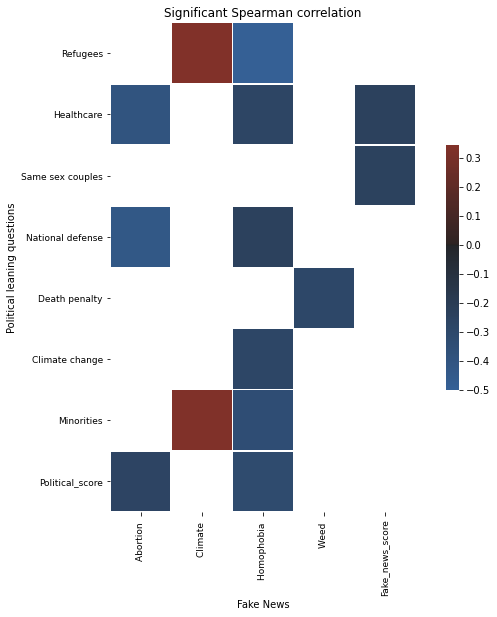

In [ ]:
FN_columns=np.array(corr_selected1_filt.columns)
FN_columns[:-1]=[x[:-2] for x in corr_selected1_filt.columns[:-1]]

plt.figure(figsize=(11,9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 15, s=75, l=40,n=9,as_cmap=True,center='dark')
# Draw the heatmap with the mask and correct aspect ratio
b = sns.heatmap(corr_selected1_filt, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
b.set_title('Significant Spearman correlation')
b.set_xlabel('Fake News')
b.set_ylabel('Political leaning questions')
b.set_yticklabels(b.get_yticklabels(), size = 9)
b.set_xticklabels(FN_columns, size = 9)

plt.show()

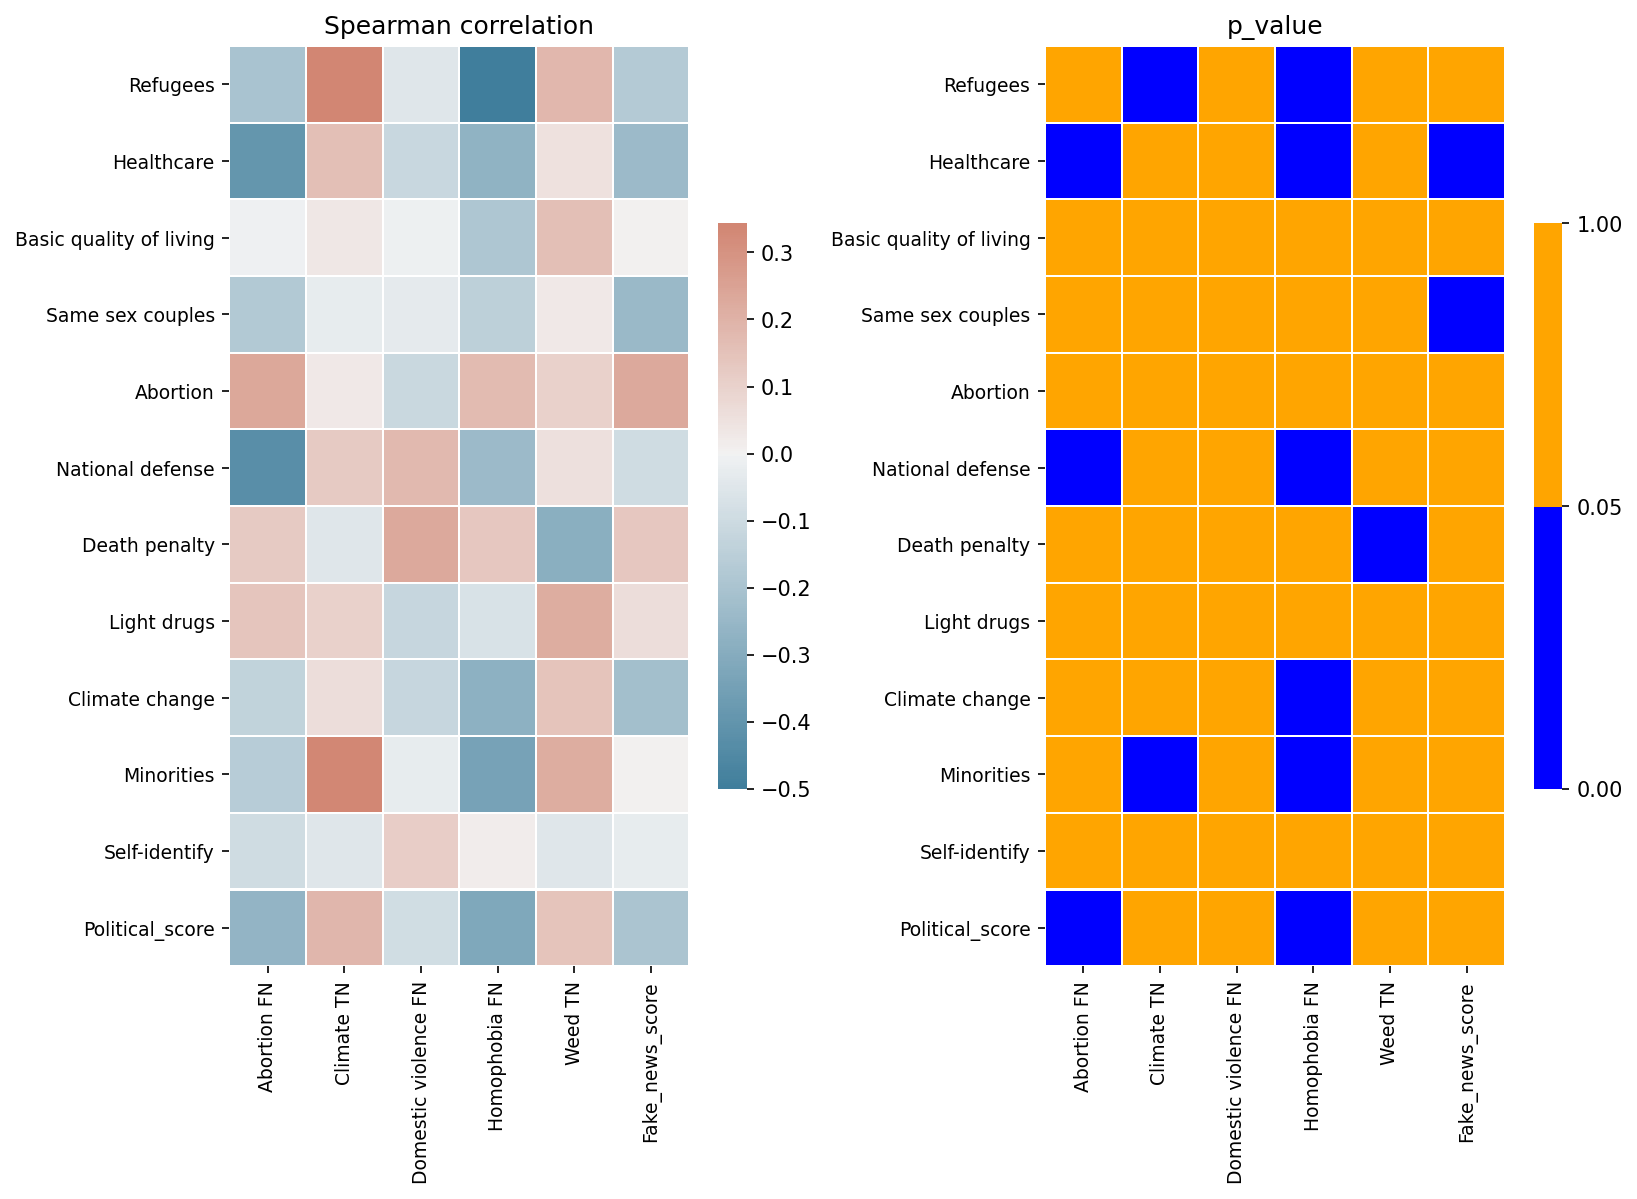

In [ ]:
f, ax = plt.subplots(ncols=2, nrows=1, figsize=(11, 9),dpi= 150)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
b = sns.heatmap(corr_selected1, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[0])
b.set_title('Spearman correlation')
b.set_yticklabels(b.get_yticklabels(), size = 9)
b.set_xticklabels(corr_selected1.columns, size = 9)

import matplotlib
# define custom colormap to show significant p-values
# source: https://stackoverflow.com/questions/62678213/seaborn-heatmap-custom-colormap
colors = ["blue", "orange"]
boundaries = [0, 0.05, 1]
norm = matplotlib.colors.BoundaryNorm(boundaries=boundaries, ncolors=256)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
b = sns.heatmap(corr_p_selected1,
            annot_kws={"size": 11},
            fmt="",
            ax=ax[1],
            cmap=cmap,
            linewidths=.5,
            cbar_kws={"shrink": .5},
            norm=norm,
            square=True)
b.set_title('p_value')
b.set_yticklabels(b.get_yticklabels(), size = 9)
b.set_xticklabels(corr_selected1.columns, size = 9)

f.tight_layout()
plt.show()

In [ ]:
corr_selected2_filt=corr_selected2.copy()
#corr_p_selected2_filt=corr_p_selected2.iloc[np.where((corr_p_selected2<0.05).any(axis=1))[0],np.where((corr_p_selected2<0.05).any(axis=0))[0]]
#corr_selected2_filt=corr_selected2.iloc[np.where((corr_p_selected2<0.05).any(axis=1))[0],np.where((corr_p_selected2<0.05).any(axis=0))[0]]
corr_selected2_filt[corr_p_selected2>0.05]=np.nan

In [ ]:
corr_p_selected2

,Abortion FN,Climate TN,Domestic violence FN,Homophobia FN,Weed TN,Fake_news_score
Agreeableness,0.288034,0.122938,0.081399,0.997572,0.651083,0.812825
Conscientiousness,0.408326,0.149353,0.996979,0.495430,0.750818,0.433781
Extraversion,0.581712,0.420457,0.466814,0.840630,0.092819,0.178299
Honesty,0.324183,0.312183,0.416691,0.837994,0.032457,0.357136
Originality,0.083185,0.696786,0.100220,0.639597,0.140805,0.305181
Resiliency,0.520541,0.247732,0.919925,0.577606,0.280515,0.662572


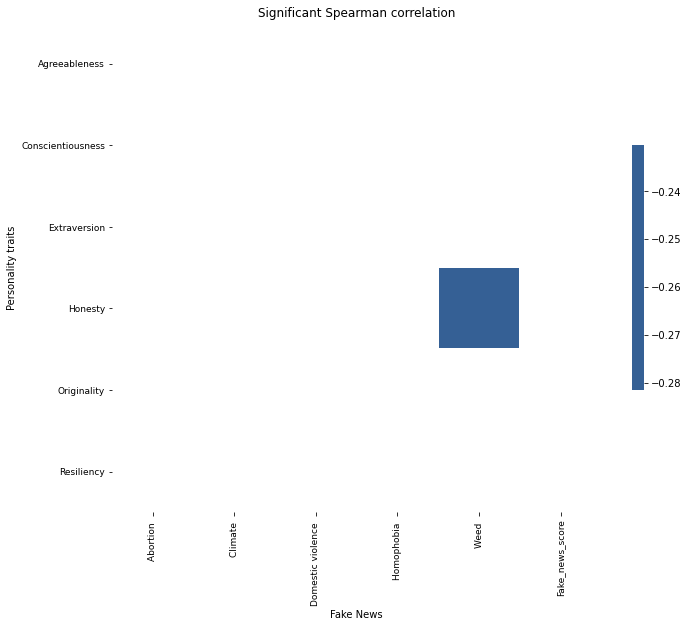

In [ ]:
FN_columns=np.array(corr_selected2_filt.columns)
FN_columns[:-1]=[x[:-2] for x in corr_selected2_filt.columns[:-1]]

plt.figure(figsize=(11,9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 15, s=75, l=40,n=9,as_cmap=True,center='dark')
# Draw the heatmap with the mask and correct aspect ratio
b = sns.heatmap(corr_selected2_filt, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
b.set_title('Significant Spearman correlation')
b.set_xlabel('Fake News')
b.set_ylabel('Personality traits')
b.set_yticklabels(b.get_yticklabels(), size = 9)
b.set_xticklabels(FN_columns, size = 9)

plt.show()

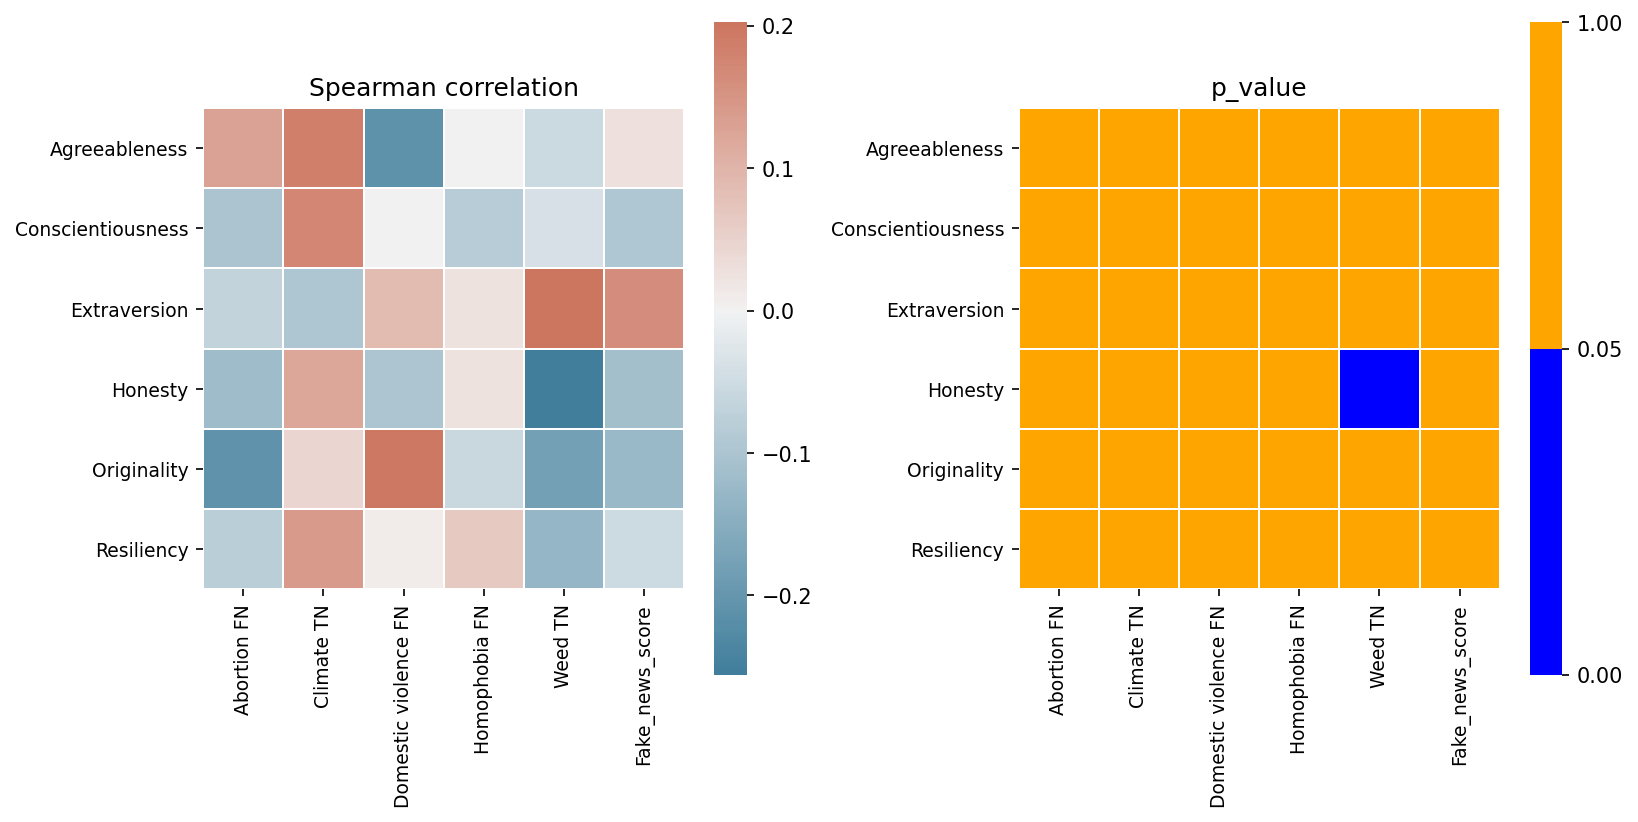

In [ ]:
f, ax = plt.subplots(ncols=2, nrows=1, figsize=(11, 9), dpi= 150)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
b = sns.heatmap(corr_selected2, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[0])
b.set_title('Spearman correlation')
b.set_yticklabels(b.get_yticklabels(), size = 9)
b.set_xticklabels(corr_selected2.columns, size = 9)

import matplotlib
# define custom colormap to show significant p-values
# source: https://stackoverflow.com/questions/62678213/seaborn-heatmap-custom-colormap
colors = ["blue", "orange"]
boundaries = [0, 0.05, 1]
norm = matplotlib.colors.BoundaryNorm(boundaries=boundaries, ncolors=256)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
b = sns.heatmap(corr_p_selected2,
            annot_kws={"size": 11},
            fmt="",
            ax=ax[1],
            cmap=cmap,
            linewidths=.5,
            cbar_kws={"shrink": .5},
            norm=norm,
            square=True)
b.set_title('p_value')
b.set_yticklabels(b.get_yticklabels(), size = 9)
b.set_xticklabels(corr_selected2.columns, size = 9)

f.tight_layout()
plt.show()

In [ ]:

corr_selected3 = corr[df_all.columns[-6:]].iloc[6:-6]
corr_p_selected3 = corr_p[df_all.columns[-6:]].iloc[6:-6]

In [ ]:
corr_p_selected3_filt=corr_p_selected3.iloc[np.where((corr_p_selected3<0.05).any(axis=1))[0],np.where((corr_p_selected3<0.05).any(axis=0))[0]]
corr_selected3_filt=corr_selected3.iloc[np.where((corr_p_selected3<0.05).any(axis=1))[0],np.where((corr_p_selected3<0.05).any(axis=0))[0]]
corr_selected3_filt[corr_p_selected3_filt>0.05]=np.nan
corr_p_selected3_filt[corr_p_selected3_filt>0.05]=np.nan

In [ ]:
corr_selected3_filt

,Agreeableness,Conscientiousness,Extraversion,Honesty,Resiliency
Basic quality of living,-0.147820,-0.242438,-0.092460,-0.105312,-0.097083
Abortion,0.191172,0.007755,0.253969,0.161778,0.057957
Death penalty,0.130011,0.160463,0.025452,0.247293,0.257917
Political_score,-0.286278,-0.114166,-0.162633,-0.133909,-0.232465


In [ ]:
corr_p_selected3_filt

,Agreeableness,Conscientiousness,Extraversion,Honesty,Resiliency
Basic quality of living,NaN,0.043162,NaN,NaN,NaN
Abortion,NaN,NaN,0.033878,NaN,NaN
Death penalty,NaN,NaN,NaN,0.039025,0.031111
Political_score,0.01628,NaN,NaN,NaN,NaN


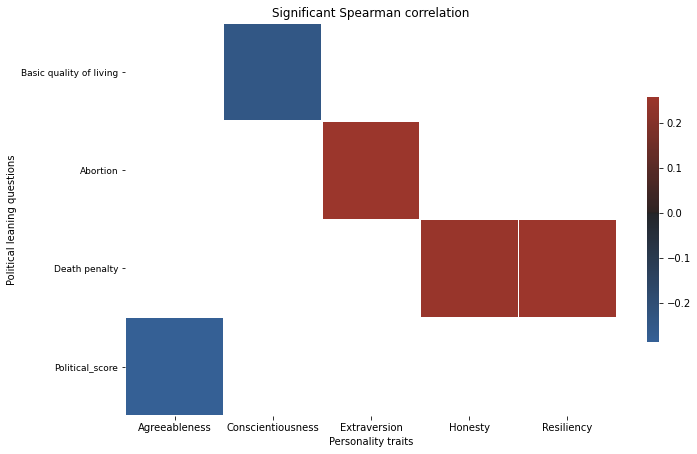

In [ ]:
FN_columns=np.array(corr_selected3_filt.columns)
FN_columns[:-1]=[x[:-2] for x in corr_selected3_filt.columns[:-1]]

plt.figure(figsize=(11,9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 15, s=75, l=40,n=9,as_cmap=True,center='dark')
# Draw the heatmap with the mask and correct aspect ratio
b = sns.heatmap(corr_selected3_filt, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
b.set_title('Significant Spearman correlation')
b.set_xlabel('Personality traits')
b.set_ylabel('Political leaning questions')
b.set_yticklabels(b.get_yticklabels(), size = 9)
#b.set_xticklabels(FN_columns, size = 9)

plt.show()

So what are the conclusions? 


In [ ]:
#Separate regressors and targets and normalise them to N(0,1) so we can consider linear regression coefficients 
#Fake_news_performance=df_all[corr_selected.columns].apply(lambda x: (x.values-x.values.mean())/x.values.std(), axis=0)
#Features=df_all[corr_selected.index[:-1]].apply(lambda x: (x.values-x.values.mean())/x.values.std(), axis=0)

Fake_news_performance=df_all.apply(lambda x: (x.values-x.values.mean())/x.values.std(), axis=0)
Features=df_all.apply(lambda x: (x.values-x.values.mean())/x.values.std(), axis=0)


Political_sign_columns=Features.columns[np.isin(Features.columns,Political_leaning.columns)]
Political_leaning_sign=Features[Political_sign_columns]
Hexaco_sign=Features[Hexaco.columns]


### Hexaco

<Figure size 1440x3600 with 0 Axes>

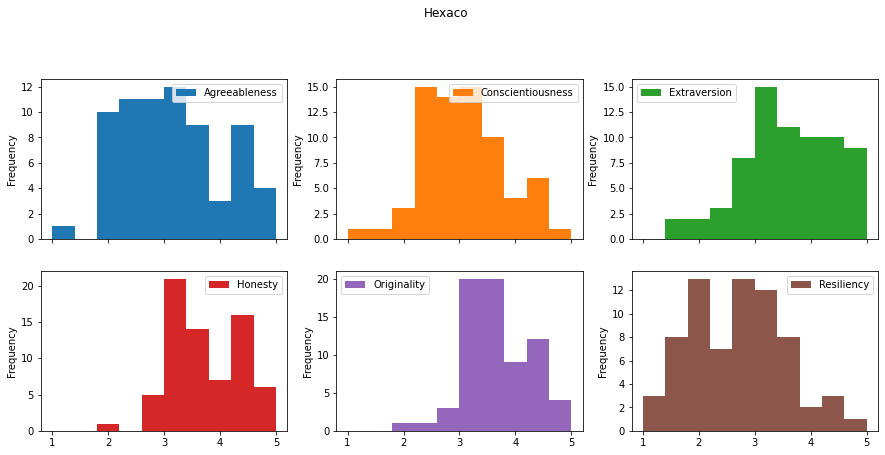

In [ ]:
plt.figure(figsize=(20,50))
Hexaco.plot.hist(subplots=True, legend=True,layout=(3,3),figsize=(15,10),title='Hexaco')
plt.show()

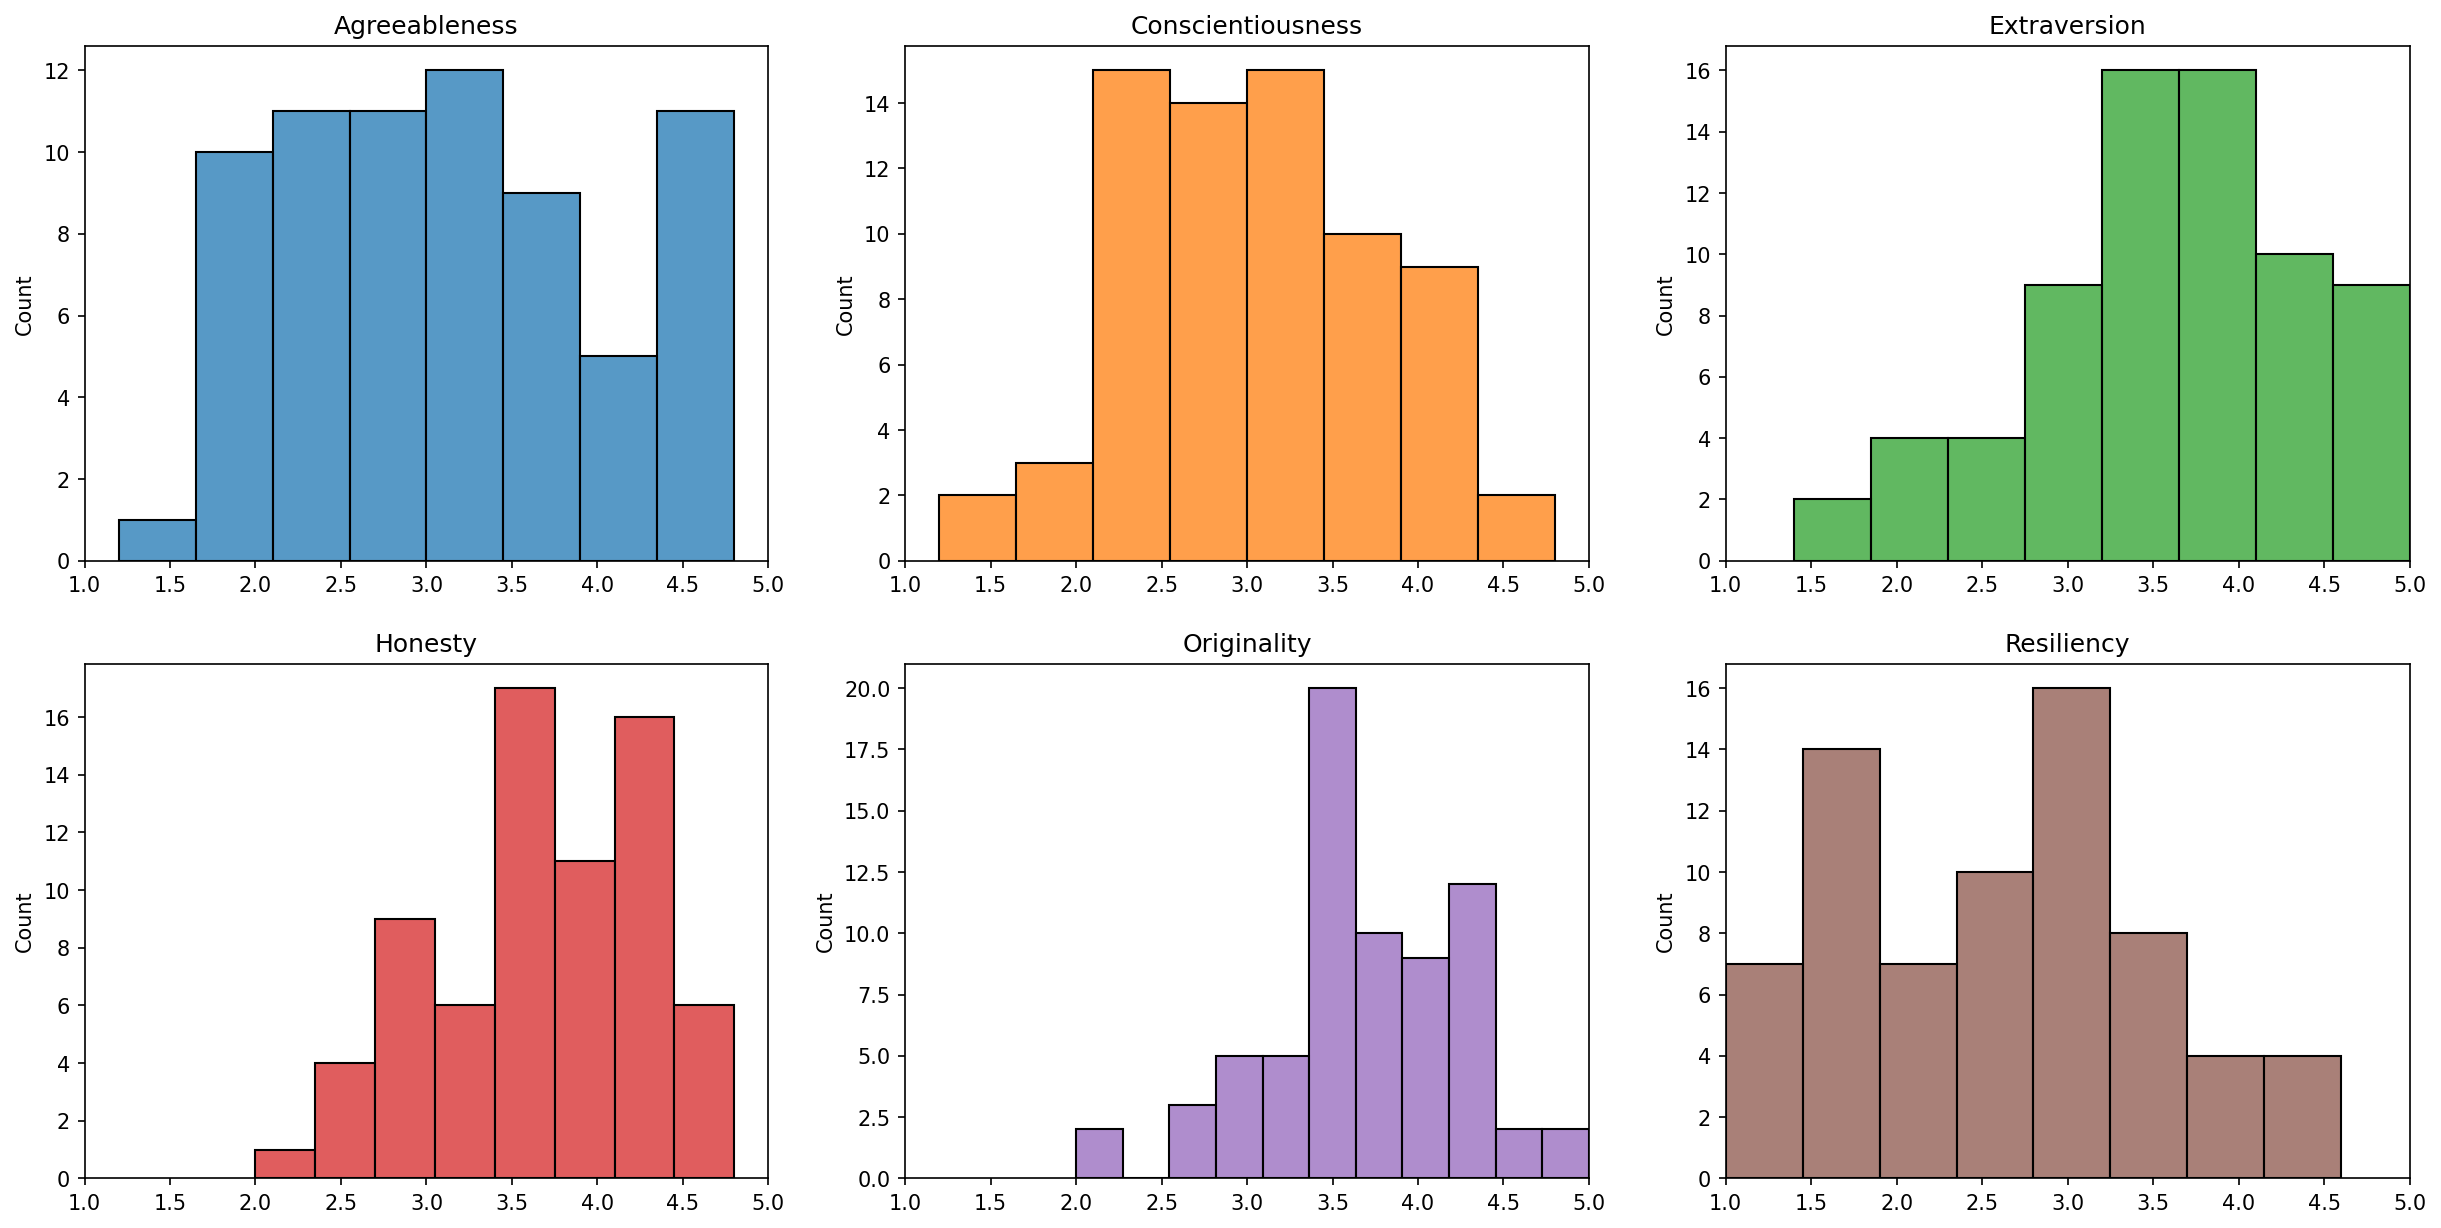

In [ ]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig = plt.figure(figsize= (20,10),dpi=150)
for i,name in enumerate(Hexaco.columns):
  plt.subplot(2,3,i+1)
  
  ax = sns.histplot(Hexaco.iloc[:,i],color = colors[i])
  plt.xlim((1,5))
  
  plt.title(name)
  plt.xlabel('')

plt.show()

Correlations between Fake news prediction performance and Hexaco is present for only one feature.
But we can't draw any conclusion on a single question

This is  Honesty vs Weed Fake News

In [ ]:
print('p_value',corr_p_selected['Weed TN'].loc['Honesty'])
print('Spearman corr',corr_selected['Weed TN'].loc['Honesty'])

p_value 0.032457333389978936
Spearman corr -0.2559611516603072


P_value is very close to 0.05 as if the feature is almost insignificant. So in general, I would say that Personality does not affect the performance in Fake News detection. 

However, if we consider "Honesty" correlation to be significant, than we may result in this conclusion.  
Honest people are mistaking with Weed-refered FN more. Maybe, because weed is mostly prohibited, so people, who are familiar with it are more used to lies on that matter.

### Regression HEXACO and fake news score => Only extraversion is significant

In [ ]:
from statsmodels.regression.linear_model import OLS

In [ ]:
def get_lr_summary_hexaco():
  reg = OLS(df_all["Fake_news_score"],Hexaco_sign).fit()
  print(reg.summary())

get_lr_summary_hexaco()

                                 OLS Regression Results                                
Dep. Variable:        Fake_news_score   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):             -0.091
Method:                 Least Squares   F-statistic:                            0.02344
Date:                Thu, 03 Jun 2021   Prob (F-statistic):                        1.00
Time:                        09:42:13   Log-Likelihood:                         -61.726
No. Observations:                  70   AIC:                                      135.5
Df Residuals:                      64   BIC:                                      148.9
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [ ]:
scipy.stats.spearmanr(df_all["Fake_news_score"],Hexaco["Originality"])

SpearmanrResult(correlation=-0.12431924633337707, pvalue=0.3051812493922466)

Regression HEXACO and political leaning => No trait is significant


In [ ]:
def get_lr_summary_hexaco_political_leaning():
  reg = OLS(df_all['Political_score'],Hexaco_sign).fit()
  print(reg.summary())

get_lr_summary_hexaco_political_leaning()

                                 OLS Regression Results                                
Dep. Variable:        Political_score   R-squared (uncentered):                   0.027
Model:                            OLS   Adj. R-squared (uncentered):             -0.064
Method:                 Least Squares   F-statistic:                             0.2991
Date:                Thu, 03 Jun 2021   Prob (F-statistic):                       0.935
Time:                        09:42:13   Log-Likelihood:                         -68.981
No. Observations:                  70   AIC:                                      150.0
Df Residuals:                      64   BIC:                                      163.5
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

### Political leaning

Set aside the stupid way. We have a smart one

Let's consider features' imapct one by one

In [ ]:
import statsmodels.regression.linear_model as LM

def get_label_summary(label_name):
    #envoke a model that predicts label by all the demographic features
    model = LM.OLS(Fake_news_performance[label_name], Features)
    res = model.fit()

    #Transform results with LR coefficients to DataFrame
    results_as_html = res.summary().tables[1].as_html()
    df_summary=pd.read_html(results_as_html, header=0, index_col=0)[0]
    
    #Consider only significant coefficients
    return df_summary[df_summary['P>|t|']<0.05][['coef', 'std err', 'P>|t|']],res

def Show_coefs(df,title):
    if len(df)==0:
      print('No significant correlations')
      return
    g=df_coefs.plot(y='coef', yerr='std err', kind="bar")
    plt.hlines(0,-1,3,color='k')
    g.set_xticklabels(labels=df.index.values,rotation=90)
    h = plt.ylabel('Impact')
    h.set_rotation(0)
    plt.title(title)
    plt.show()

#### Abortion

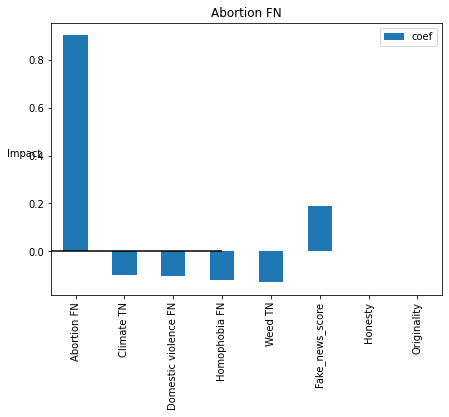

,coef,std err,P>|t|
Abortion FN,9.034000e-01,2.990000e-16,0.000
Climate TN,-9.910000e-02,2.730000e-16,0.000
Domestic violence FN,-1.018000e-01,2.590000e-16,0.000
Homophobia FN,-1.181000e-01,2.930000e-16,0.000
Weed TN,-1.291000e-01,2.650000e-16,0.000
Fake_news_score,1.910000e-01,1.760000e-16,0.000
Honesty,-7.268000e-16,3.040000e-16,0.021
Originality,8.075000e-16,2.850000e-16,0.007


In [ ]:
Target='Abortion FN'
df_coefs,model=get_label_summary(Target)
Show_coefs(df_coefs,Target)
df_coefs

 - More acceptable Death penalty - better Abortion FN performance. Apparently they are more familiar with people murdering then the others (joke) ((actually, a terrible one))
 
 
 - More money on National defense - less Abortion FN performance. Militarists are not good in matters concerned with children? hmm
 
 - Less healthcare from government - better Abortion FN performance. Maybe people who pay for their healthcare are more likely to understand more abortions (abortion is a medical operation after all)
 
 Btw it is funny that political leaning question about abortions doesn't affect performance in detecting fake news about abortions

#### Climate

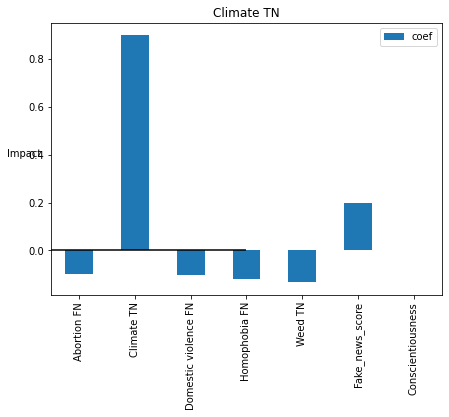

,coef,std err,P>|t|
Abortion FN,-9.910000e-02,1.120000e-15,0.000
Climate TN,8.984000e-01,1.020000e-15,0.000
Domestic violence FN,-1.044000e-01,9.690000e-16,0.000
Homophobia FN,-1.211000e-01,1.100000e-15,0.000
Weed TN,-1.324000e-01,9.920000e-16,0.000
Fake_news_score,1.959000e-01,6.590000e-16,0.000
Conscientiousness,2.321000e-15,1.070000e-15,0.036


In [ ]:
Target='Climate TN'
df_coefs,model=get_label_summary(Target)
Show_coefs(df_coefs,Target)
df_coefs

#### Homophobia

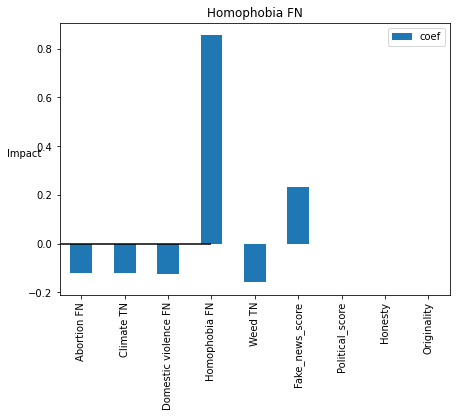

,coef,std err,P>|t|
Abortion FN,-1.181000e-01,4.020000e-16,0.000
Climate TN,-1.211000e-01,3.680000e-16,0.000
Domestic violence FN,-1.244000e-01,3.480000e-16,0.000
Homophobia FN,8.556000e-01,3.940000e-16,0.000
Weed TN,-1.578000e-01,3.560000e-16,0.000
Fake_news_score,2.335000e-01,2.370000e-16,0.000
Political_score,2.429000e-16,1.150000e-16,0.040
Honesty,9.819000e-16,4.090000e-16,0.020
Originality,-8.179000e-16,3.840000e-16,0.038


In [ ]:
Target='Homophobia FN'
df_coefs,model=get_label_summary(Target)
Show_coefs(df_coefs,Target)
df_coefs

#### Weed

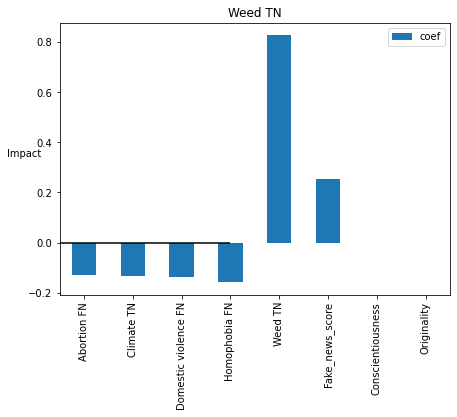

,coef,std err,P>|t|
Abortion FN,-1.291000e-01,2.950000e-16,0.000
Climate TN,-1.324000e-01,2.700000e-16,0.000
Domestic violence FN,-1.361000e-01,2.550000e-16,0.000
Homophobia FN,-1.578000e-01,2.890000e-16,0.000
Weed TN,8.274000e-01,2.610000e-16,0.000
Fake_news_score,2.553000e-01,1.740000e-16,0.000
Conscientiousness,6.731000e-16,2.830000e-16,0.021
Originality,-6.679000e-16,2.810000e-16,0.022


In [ ]:
Target='Weed TN'
df_coefs,model=get_label_summary(Target)
Show_coefs(df_coefs,Target)
df_coefs

#### fake news scores

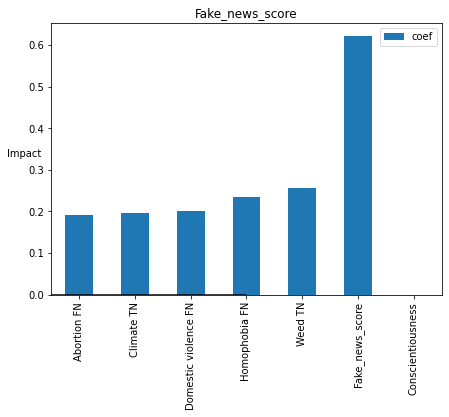

,coef,std err,P>|t|
Abortion FN,1.910000e-01,5.980000e-16,0.000
Climate TN,1.959000e-01,5.470000e-16,0.000
Domestic violence FN,2.012000e-01,5.180000e-16,0.000
Homophobia FN,2.335000e-01,5.850000e-16,0.000
Weed TN,2.553000e-01,5.300000e-16,0.000
Fake_news_score,6.224000e-01,3.520000e-16,0.000
Conscientiousness,1.457000e-15,5.730000e-16,0.014


In [ ]:
Target='Fake_news_score'
df_coefs,model=get_label_summary(Target)
Show_coefs(df_coefs,Target)
df_coefs

#### FN Scores vs. Political Scores

In [ ]:
import statsmodels.api as sm
from statsmodels.api import OLS


def get_lr_summary(label_name):
  X = Features[label_name]
  X1 = sm.add_constant(X)
  y = Features['Political_score']
  reg = OLS(y,X1).fit()
  
  print(reg.summary())
  

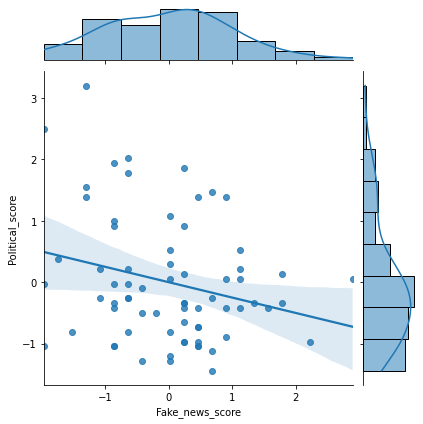

In [ ]:
sns.jointplot(x=Features['Fake_news_score'],y=Features['Political_score'],kind="reg")

In [ ]:
Target='Fake_news_score'
get_lr_summary(Target)

                            OLS Regression Results                            
Dep. Variable:        Political_score   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     4.546
Date:                Thu, 03 Jun 2021   Prob (F-statistic):             0.0366
Time:                        10:21:14   Log-Likelihood:                -97.061
No. Observations:                  70   AIC:                             198.1
Df Residuals:                      68   BIC:                             202.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -6.028e-16      0.117  -5.

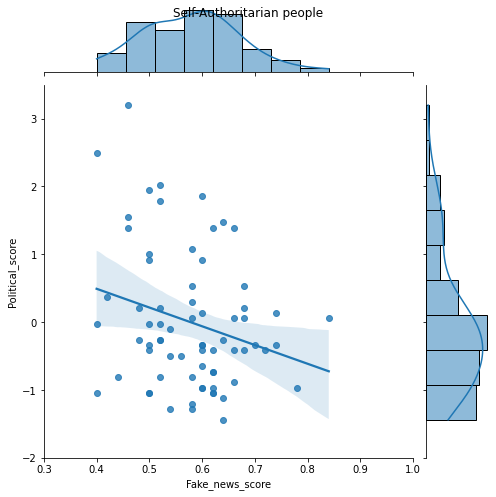

In [ ]:
g=sns.jointplot(x=df_all['Fake_news_score'], y=Political_leaning_sign['Political_score'],
                  kind="reg",height=7,xlim=(0.3,1),ylim=(-2,3.5))
g.fig.suptitle('Self-Authoritarian people')
plt.show()

## Regressions for scores

In [ ]:
def get_labels_summary(X,y):
    #envoke a model that predicts label by all the demographic features
    model = LM.OLS(y, X)
    res = model.fit()
    print(res.rsquared)
    #Transform results with LR coefficients to DataFrame
    results_as_html = res.summary().tables[1].as_html()
    df_summary=pd.read_html(results_as_html, header=0, index_col=0)[0]
    
    #Consider only significant coefficients
    return df_summary[df_summary['P>|t|']<0.05][['coef', 'std err', 'P>|t|','[0.025','0.975]']],res

In [ ]:
X=Features[]
y=Features['Fake_news_score']
df_coefs,model=get_labels_summary(X,y)
sns.jointplot(x=X,y=y,kind="reg")
df_coefs

SyntaxError: ignored

In [ ]:
def get_label_summary_hexaco(label_name):
    #envoke a model that predicts label by all the demographic features
    model = LM.OLS(Features[label_name], Features[Hexaco.columns])
    res = model.fit()

    #Transform results with LR coefficients to DataFrame
    results_as_html = res.summary().tables[1].as_html()
    df_summary=pd.read_html(results_as_html, header=0, index_col=0)[0]
    
    #Consider only significant coefficients
    return df_summary[['coef', 'std err', 'P>|t|','[0.025','0.975]']],res

In [ ]:
len(Features)

In [ ]:
df_coefs,model=get_label_summary_hexaco('Fake_news_score')
df_coefs

,coef,std err,P>|t|,[0.025,0.975]
Agreeableness,0.0215,0.145,0.883,-0.269,0.312
Conscientiousness,-0.0189,0.130,0.885,-0.278,0.240
Extraversion,0.1936,0.123,0.119,-0.051,0.438
Honesty,-0.2061,0.126,0.108,-0.459,0.046
Originality,-0.0829,0.128,0.519,-0.339,0.173
Resiliency,0.0105,0.148,0.944,-0.285,0.306


In [ ]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.006   
Dependent Variable:     Fake_news_score  AIC:                         203.9386
Date:                   2021-06-03 10:43 BIC:                         217.4295
No. Observations:       70               Log-Likelihood:              -95.969 
Df Model:               6                F-statistic:                 1.074   
Df Residuals:           64               Prob (F-statistic):          0.388   
R-squared (uncentered): 0.091            Scale:                       0.99373 
--------------------------------------------------------------------------------
                         Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------------------
Agreeableness            0.0215     0.1454    0.1479   0.8829   -0.2690   0.3121
Conscientiousness       -0.0189     0.1296   -0.1456   0.8847   -0.2777   0.2400
Extraversion             0.1936     0.1226    1.5799   0.1191   -0.0512   0.4385
Honesty                 -0.2061     0.1263   -1.6313   0.1077   -0.4585   0.0463
Originality             -0.0829     0.1280   -0.6478   0.5194   -0.3386   0.1728
Resiliency               0.0105     0.1478    0.0708   0.9438   -0.2849   0.3058
------------------------------------------------------------------------------
Omnibus:                   0.195            Durbin-Watson:               1.635
Prob(Omnibus):             0.907            Jarque-Bera (JB):            0.356
Skew:                      0.099            Prob(JB):                    0.837
Kurtosis:                  2.713            Condition No.:               2    
==============================================================================

"""

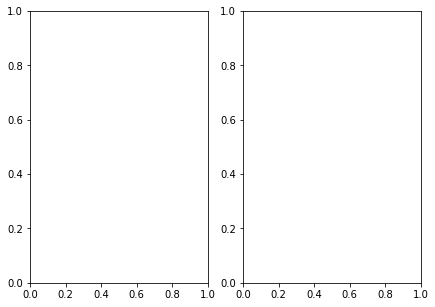

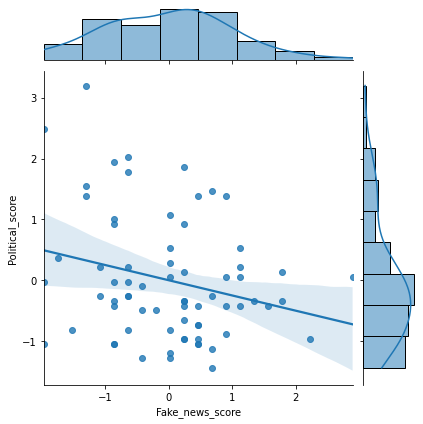

In [ ]:
fig,ax=plt.subplots(1,2)
#ax[0].scatter(Features['Fake_news_score'],Features['Political_score'])
sns.jointplot(ax=ax[0],x=Features['Fake_news_score'],y=Features['Political_score'],kind="reg")
#sns.jointplot(ax=ax[0],x=Features['Extraversion'],y=Features['Political_score'],kind="reg")
plt.show()

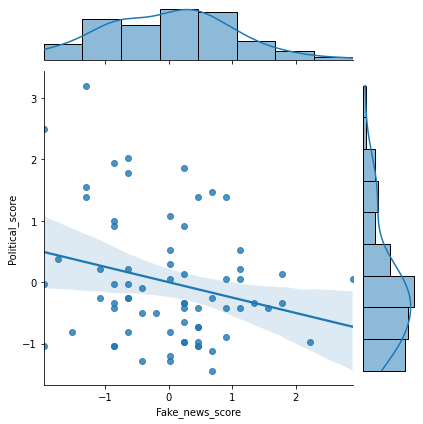

In [ ]:
JG1 = sns.jointplot(x=Features['Fake_news_score'],y=Features['Political_score'],kind="reg")
JG1.ax_marg_y.set_axis_off()

[]

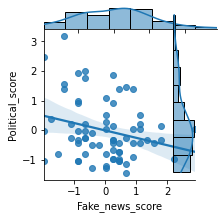

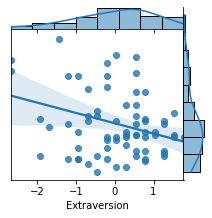

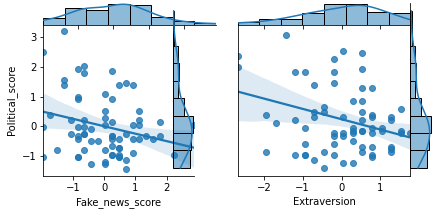

In [ ]:
JG1 = sns.jointplot(x=Features['Fake_news_score'],y=Features['Political_score'],kind="reg")
JG1.ax_marg_y.set_axis_off()
JG2 = sns.jointplot(x=Features['Extraversion'],y=Features['Political_score'],kind="reg")


#subplots migration
f = plt.figure()
for J in [JG1, JG2]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)


#subplots size adjustment
f.axes[0].set_position([0.1, 0.1, 0.35,  0.35])
f.axes[1].set_position([0.1, 0.45, 0.4,  0.05])
f.axes[2].set_position([0.4, 0.1, 0.05, 0.4])
f.axes[3].set_position([0.55, 0.1, 0.4,  0.4])
f.axes[4].set_position([0.55, 0.45, 0.4,  0.05])
f.axes[5].set_position([0.95, 0.1, 0.05, 0.4])

#JG1.ax_marg_y.set_axis_off()
#f.axes[1].ax_marg_y.set_axis_off()
f.axes[3].set_ylabel('')
f.axes[3].set_yticklabels([])
f.axes[3].set_yticks([])

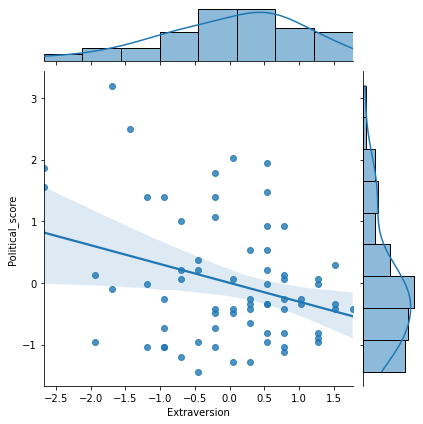

In [ ]:
sns.jointplot(x=Features['Extraversion'],y=Features['Political_score'],kind="reg")

In [ ]:
df_coefs,model=get_label_summary_hexaco('Political_score')
df_coefs

,coef,std err,P>|t|,[0.025,0.975]
Agreeableness,-0.1038,0.141,0.464,-0.385,0.178
Conscientiousness,0.0378,0.126,0.764,-0.213,0.289
Extraversion,-0.3075,0.119,0.012,-0.545,-0.070
Honesty,-0.1111,0.122,0.367,-0.356,0.133
Originality,-0.0787,0.124,0.528,-0.326,0.169
Resiliency,-0.0866,0.143,0.547,-0.373,0.199


In [ ]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.067   
Dependent Variable:     Political_score  AIC:                         199.4916
Date:                   2021-06-03 10:39 BIC:                         212.9826
No. Observations:       70               Log-Likelihood:              -93.746 
Df Model:               6                F-statistic:                 1.844   
Df Residuals:           64               Prob (F-statistic):          0.105   
R-squared (uncentered): 0.147            Scale:                       0.93257 
--------------------------------------------------------------------------------
                        Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
--------------------------------------------------------------------------------
Agreeableness          -0.1038     0.1409   -0.7370   0.4638   -0.3853    0.1776
Conscientiousness       0.0378     0.1255    0.3012   0.7642   -0.2130    0.2886
Extraversion           -0.3075     0.1187   -2.5902   0.0119   -0.5447   -0.0703
Honesty                -0.1111     0.1224   -0.9077   0.3674   -0.3556    0.1334
Originality            -0.0787     0.1240   -0.6349   0.5277   -0.3264    0.1690
Resiliency             -0.0866     0.1432   -0.6049   0.5474   -0.3727    0.1995
------------------------------------------------------------------------------
Omnibus:                   8.826            Durbin-Watson:               1.842
Prob(Omnibus):             0.012            Jarque-Bera (JB):            8.395
Skew:                      0.805            Prob(JB):                    0.015
Kurtosis:                  3.536            Condition No.:               2    
==============================================================================

"""

In [ ]:
sns.jointplot(x=Features['Extraversion'],y=Features['Political_score'],kind="reg")

## One vs One correlations

# Evrthng else

In [ ]:
# change into your path to make it work
%cd 'drive/MyDrive/epfl/Fakenews/StatAnalysis/'
%ls

In [ ]:
import pandas as pd

data = pd.read_excel('Data_Processed.xlsx')

In [ ]:
data.describe()

## Data Exploration

## Regression analysis